In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

b17ff3d9419b009135623a702d3610ad


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lat']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | moussoro
Processing Record 3 of Set 1 | berlevag
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | kochki
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | bata
Processing Record 8 of Set 1 | omboue
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | chadiza
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | danilov
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | busselton
Processing

City not found. Skipping...
Processing Record 42 of Set 4 | north vanlaiphai
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | raudeberg
Processing Record 45 of Set 4 | iberia
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | vaitape
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | aksu
Processing Record 0 of Set 5 | afipskiy
Processing Record 1 of Set 5 | tiznit
Processing Record 2 of Set 5 | whitehaven
Processing Record 3 of Set 5 | patacamaya
Processing Record 4 of Set 5 | dicabisagan
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | tongren
Processing Record 9 of Set 5 | pedernales
Processing Record 10 of Set 5 | lincoln
Processing Record 11 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 5 | lavrentiya
Processing Record 13 of Set 5 | cherskiy
Processing Record 14

Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | kencong
Processing Record 34 of Set 8 | camacha
Processing Record 35 of Set 8 | podporozhye
Processing Record 36 of Set 8 | banjar
Processing Record 37 of Set 8 | arlit
Processing Record 38 of Set 8 | ust-kuyga
Processing Record 39 of Set 8 | octeville
Processing Record 40 of Set 8 | muros
Processing Record 41 of Set 8 | zhelyabovka
Processing Record 42 of Set 8 | brainerd
Processing Record 43 of Set 8 | mokobeng
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | necochea
Processing Record 46 of Set 8 | moose factory
Processing Record 47 of Set 8 | aflu
City not found. Skipping...
Processing Record 48 of Set 8 | auras
Processing Record 49 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 0 of Set 9 | toungoo
City not found. Skipping...
Processing Record 1 of Set 9 | oktyabrskiy
Processing Record 2 of Set 9 | koslan
Processing Record 3 of Set 9 | balkanabat
Processi

Processing Record 19 of Set 12 | inyonga
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | amboasary
Processing Record 22 of Set 12 | stratonion
Processing Record 23 of Set 12 | krasnoselkup
Processing Record 24 of Set 12 | goryachegorsk
Processing Record 25 of Set 12 | faya
Processing Record 26 of Set 12 | arcata
Processing Record 27 of Set 12 | gobabis
Processing Record 28 of Set 12 | tommot
Processing Record 29 of Set 12 | maghama
City not found. Skipping...
Processing Record 30 of Set 12 | cape canaveral
Processing Record 31 of Set 12 | cheyenne
Processing Record 32 of Set 12 | thanh hoa
Processing Record 33 of Set 12 | xining
Processing Record 34 of Set 12 | zatyshshya
Processing Record 35 of Set 12 | gao
Processing Record 36 of Set 12 | margate
Processing Record 37 of Set 12 | shebunino
Processing Record 38 of Set 12 | fenoarivo
Processing Record 39 of Set 12 | caravelas
Processing Record 40 of Set 12 | trairi
Processing Record 41 of Set 12 | sikea
C

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,-33.0153,24.52,38,0,9.77,ZA,1681125515
1,moussoro,13.6408,13.6408,40.57,10,100,1.43,TD,1681125515
2,berlevag,70.8578,70.8578,3.00,81,100,10.80,NO,1681125516
3,vaini,-21.2000,-21.2000,26.09,89,20,3.09,TO,1681125516
4,kochki,54.3358,54.3358,9.22,44,78,6.58,RU,1681125516


In [6]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,-33.0153,24.52,38,0,9.77,ZA,1681125515
1,moussoro,13.6408,13.6408,40.57,10,100,1.43,TD,1681125515
2,berlevag,70.8578,70.8578,3.00,81,100,10.80,NO,1681125516
3,vaini,-21.2000,-21.2000,26.09,89,20,3.09,TO,1681125516
4,kochki,54.3358,54.3358,9.22,44,78,6.58,RU,1681125516


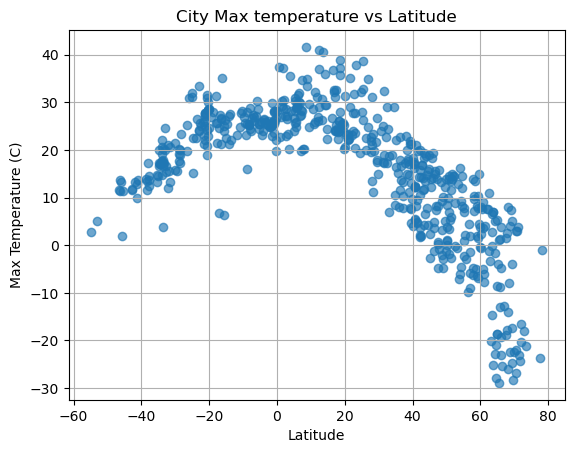

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], alpha = .65)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max temperature vs Latitude")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

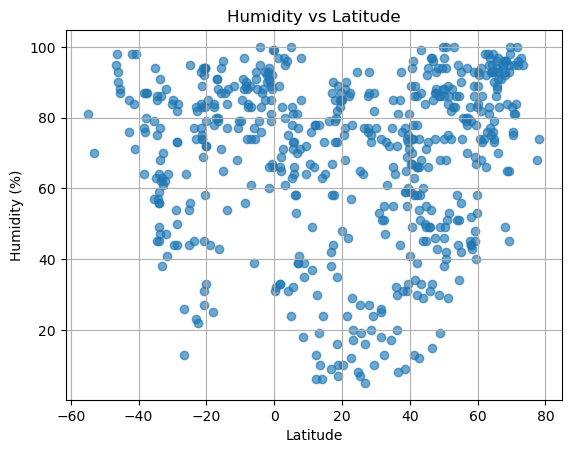

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], alpha = .65)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

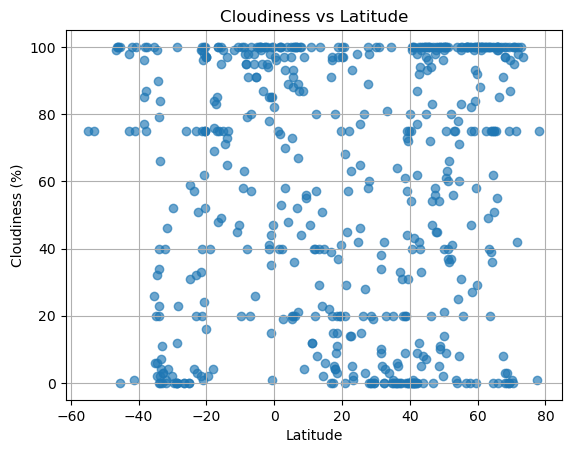

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], alpha = .65)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

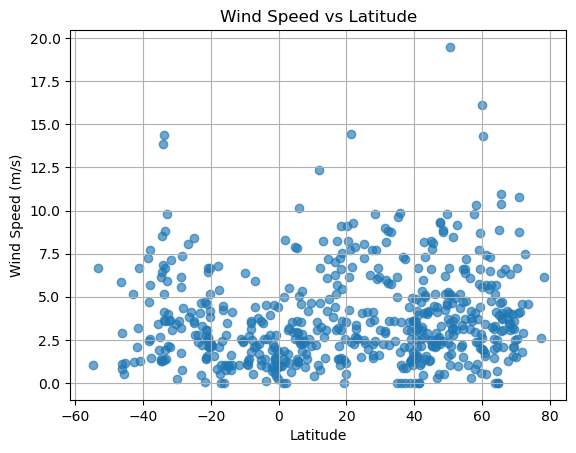

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], alpha = .65)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#regress_values = x_values * slope + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,moussoro,13.6408,13.6408,40.57,10,100,1.43,TD,1681125515
2,berlevag,70.8578,70.8578,3.00,81,100,10.80,NO,1681125516
4,kochki,54.3358,54.3358,9.22,44,78,6.58,RU,1681125516
6,bata,1.8639,1.8639,28.76,69,100,1.23,GQ,1681125517
8,ponta do sol,32.6667,32.6667,24.35,47,4,2.19,PT,1681125519


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,-33.0153,24.52,38,0,9.77,ZA,1681125515
3,vaini,-21.2000,-21.2000,26.09,89,20,3.09,TO,1681125516
5,ushuaia,-54.8000,-54.8000,2.81,81,75,1.03,AR,1681125516
7,omboue,-1.5746,-1.5746,29.95,66,85,2.28,GA,1681125518
10,port lincoln,-34.7333,-34.7333,17.19,63,20,6.16,AU,1681125220


The r-value is: 0.7229532908542786


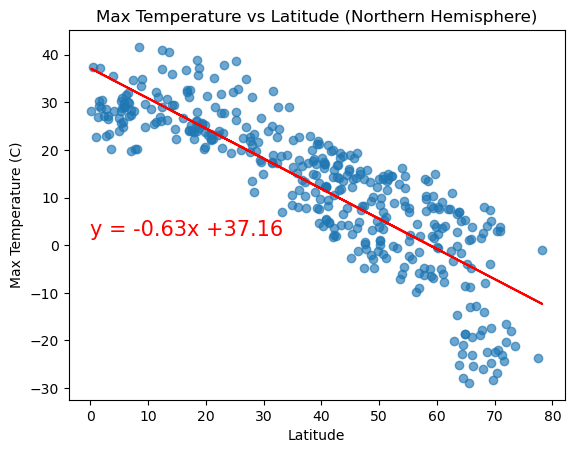

In [15]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")


In [ ]:
# This model shows us the general relationship between  cities in the northern hemisphere,
# which are denoted by latitude, in relation to cities maximum temparature. 
# We see a general downward trend for this relationship, also shown by the negative slope.
#This suggests as our latitude increases and we get further away from a latitude of 0, the max temperature decreases.
#This would make sense as the areas closer to the center of the world, so cities closer to a latitude of 0,
# are closer to the equator which is generally known to be warmer. As you go further up north , it gets colder.


The r-value is: 0.4950825917515791


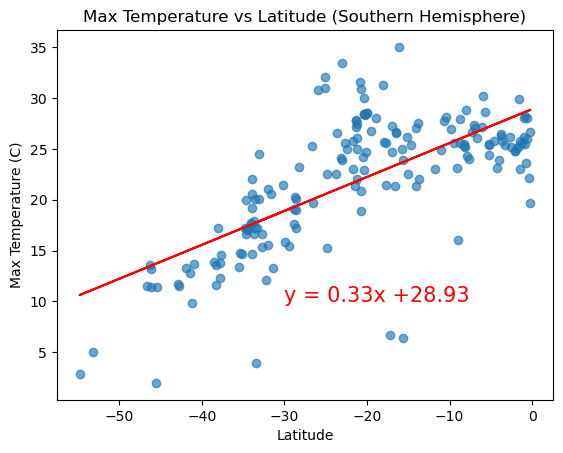

In [16]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs Latitude (Southern Hemisphere)")
print(f"The r-value is: {rvalue**2}")

In [ ]:
# This model shows us the general relationship between  cities in the southern hemisphere,
# which are denoted by latitude, in relation to cities maximum temparature. 
# We see a general upward trend for this relationship, also shown by the positive slope.
#This suggests as our latitude increases and we approch a latitude of 0, the max temperature increases
#This would make sense as the areas closer to the center of the world, so cities closer to a latitude of 0,
# are closer to the equator which is generally known to be warmer. As you go get further away from the south
# pole, it gets warmer and warmer.


The r-value is: 0.10982970643231292


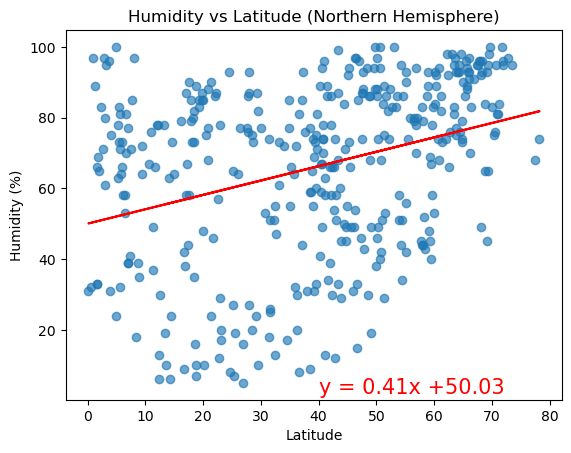

In [17]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,2),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.037556947220261094


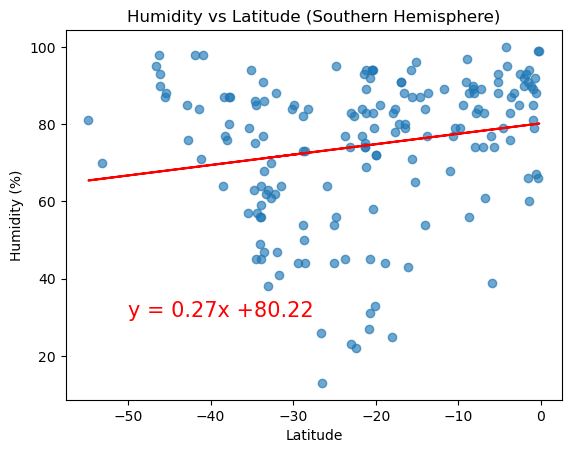

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.023731083823351096


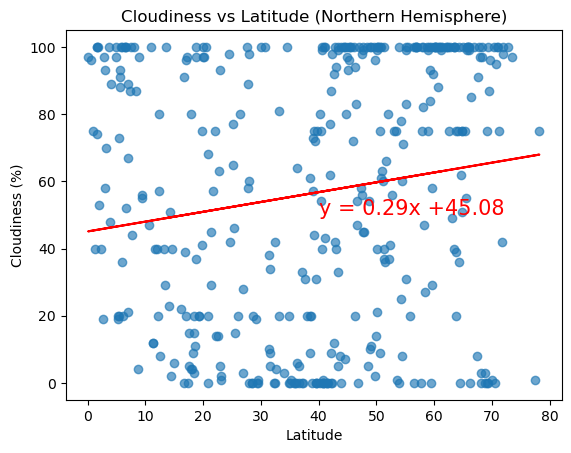

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.06921291101419448


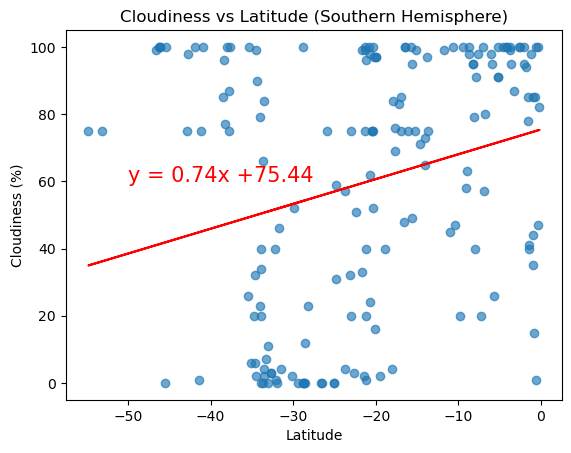

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.006399256444801557


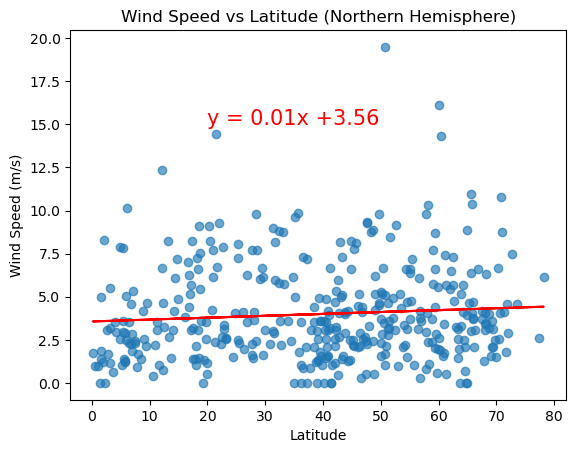

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.10075978986219704


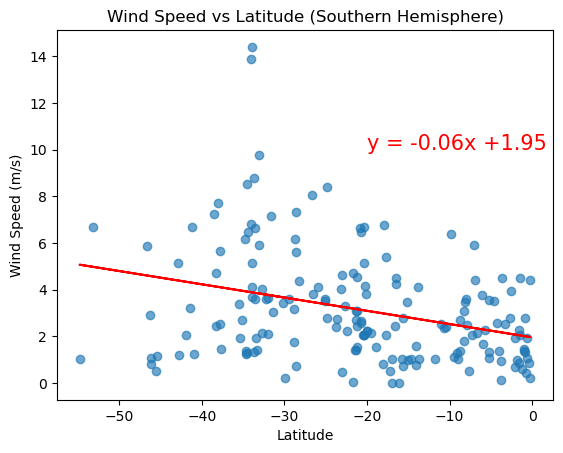

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")